In [1]:
# -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import cv2
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import collections  as mc
from matplotlib import colors as mcolors
import pandas as pd
from nptdms import TdmsFile
from scipy.signal import savgol_filter
import tifffile as tif
from scipy import interpolate
from scipy.interpolate import interp1d
%matplotlib widget

In [2]:
# read the sequence data along DNA
# name example: 20200304-160513 10pN- 30nM DNAp + 0.1mg_mL_BSA #019-002
# seq_name = input('please type in the file name:' ) + '.xlsx'
# seq_name = 'GC content of lambda.xlsx'
# # path example: C:\Users\12345\Desktop
# # seq_path = input('please type in the file path:')
# seq_path = 'E:\Google Cloud\T7 gp2.5 MS_2021\Data&CodeRepository\Fig4'
# seq_filename = os.path.join(seq_path, seq_name) 
seq_filename = '/Users/longfu/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/T7 gp2.5 MS_2021/Data&CodeRepository/Fig4/GC content of lambda.xlsx' 
data_seq_lambda = pd.read_excel(seq_filename)
print(data_seq_lambda.head())

   DNA length  GC content  Smoothed Y1 (100 pts SG)  Smoothed Y2 (200 pts SG)  \
0     0.00000     0.60000                   0.49022                   0.49781   
1     0.03001     0.40000                   0.49163                   0.49872   
2     0.06003     0.23333                   0.49302                   0.49962   
3     0.09004     0.33333                   0.49440                   0.50053   
4     0.12005     0.56667                   0.49576                   0.50142   

   AT content  Smoothed Y3 (100 pts SG)  Smoothed Y4 (200 pts SG)  
0     0.40000                   0.50978                   0.50219  
1     0.60000                   0.50837                   0.50128  
2     0.76667                   0.50698                   0.50038  
3     0.66667                   0.50560                   0.49947  
4     0.43333                   0.50424                   0.49858  


In [3]:
seq = data_seq_lambda['DNA length'].dropna()
GC_ratio = data_seq_lambda['Smoothed Y1 (100 pts SG)'].dropna() 
print(len(seq))
# print(len(sequence_index))

# # In order to calculate the the intensity of protein trace as a function of time (px), we first need the locate the protein trace based on DNA trajectory
# # this is done by reading the coordinates (time, position) of protein trace in kymograph based on the overlapping of force data and image data.
# # Since the sampling rate is different between force data and image data, therefore interpolate is performed
# func = interpolate.interp1d(seq,GC_ratio,kind='slinear',fill_value="extrapolate")
# GC_ratio_interpolate = func(np.array(sequence_index)/1000)
# print(len(GC_ratio_interpolate))

1617


In [4]:
pause

NameError: name 'pause' is not defined

In [5]:
# # read raw image data of .tdms file with TdmsFile function
# # name example: 20200304-160513 10pN- 30nM DNAp + 0.1mg_mL_BSA #019-002
# koff_name = input('please type in the file name:' ) + '.xlsx'
# # kymo_name = input('please type in the file name:' ) 
# # path example: C:\Users\12345\Desktop
# koff_path = input('please type in the file path:')
# koff_filename = os.path.join(koff_path, koff_name) 
koff_filename = '/Users/longfu/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/T7 gp2.5 MS_2021/Data&CodeRepository/Fig4/koff_kon_x_dependence.xlsx'
# koff_filename = 'E:\OneDrive - Vrije Universiteit Amsterdam\T7 gp2.5 MS_2021\Data&CodeRepository\Fig4\koff_kon_x_dependence.xlsx'

         #Mol  bin lower edge (nm)  bin centers       dt(ms)  sem dt(ms)  \
0  12_1(23_1)          1978.513131  2510.300303  1488.522124  177.112612   
1         NaN          3042.087475  3573.874646  2198.484848  319.457974   
2         NaN          4105.661818  4637.448990  2206.076336  405.171596   
3         NaN          5169.236161  5701.023333  1260.774436   94.624437   
4         NaN          6232.810505  6764.597677  1728.895425  157.753512   

   k_off(s^-1)  error_k_off(s^-1)  Unnamed: 7       seq_ind seq_ind_inverse  \
0     0.671807           0.079935         NaN   1276.368421    45948.631579   
1     0.454859           0.066095         NaN   3829.105263    43395.894737   
2     0.453293           0.083253         NaN   6381.842105    40843.157895   
3     0.793163           0.059529         NaN   8934.578947    38290.421053   
4     0.578404           0.052777         NaN  11487.315789    35737.684211   

   ... Unnamed: 12 Unnamed: 13  Unnamed: 14     seq_index  Koff_12_1

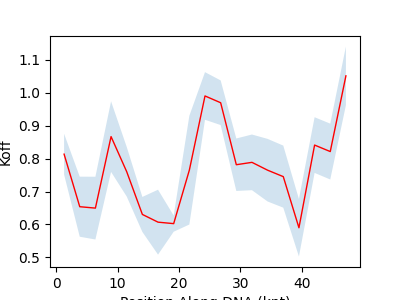

In [6]:
data_koff = pd.read_excel(koff_filename,sheet_name = 'Summary_koff__wt_12pN')
print(data_koff.head())

seq_ind_koff = data_koff['seq_index']/1000
seq_koff = data_koff['koff_ave']
seq_koff_sem = data_koff['koff_sem']

plt.figure(figsize=(4,3))
plt.xlabel("Position Along DNA (knt)")
plt.ylabel("Koff")
plt.plot(seq_ind_koff,seq_koff,'r',linewidth = 1, label = 'T7 gp2.5 Intensity')
plt.fill_between(seq_ind_koff, seq_koff - seq_koff_sem, seq_koff + seq_koff_sem,alpha=0.2)
# plt.ylim(25,85)
# plt.legend()
plt.show()
plt.tight_layout()

  Unnamed: 0         12_1  \
0       12_1       x (nm)   
1        NaN  3042.087475   
2        NaN  5169.236161   
3        NaN  7296.384848   
4        NaN  9423.533535   

  20150326-164028 ssDNA gp2.5-Alexa555 12 pN 6 ms fl #023-001 Unnamed: 3  \
0                                      duration (ms)                 NaN   
1                                       668265.64278                 NaN   
2                                      618039.750667                 NaN   
3                                      513115.176211                 NaN   
4                                      543332.866951                 NaN   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         Na

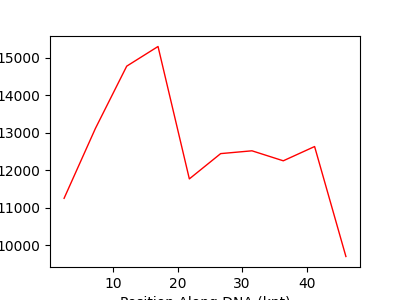

In [7]:
data_kon = pd.read_excel(koff_filename,sheet_name = 'Summary_kon__wt_12pN')
print(data_kon.head())

seq_ind_kon = data_kon['seq_index']/1000
seq_kon = data_kon['kon_ave']
seq_kon_sem = data_kon['kon_sem']

plt.figure(figsize=(4,3))
plt.xlabel("Position Along DNA (knt)")
plt.ylabel("Kon")
plt.plot(seq_ind_kon,seq_kon,'r',linewidth = 1, label = 'T7 gp2.5 Intensity')
# plt.ylim(25,85)
# plt.legend()
plt.show()
plt.tight_layout()

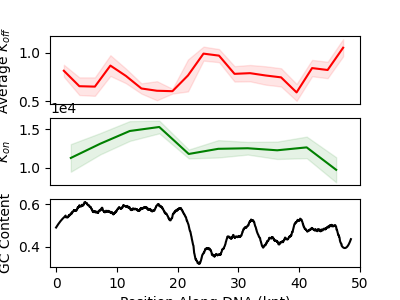

In [50]:
fig, ax = plt.subplots(figsize=(4,3))

ax1 = plt.subplot(311)                                                        
ax1.plot(seq_ind_koff,seq_koff,'r',linewidth =1.5, label = 'Koff')
ax1.fill_between(seq_ind_koff, seq_koff - seq_koff_sem, seq_koff + seq_koff_sem,color = 'red', alpha=0.1)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# ax1.set_ylabel('Average $K_{off}$ ($s^{-1}$)')
ax1.set_ylabel('Average $K_{off}$')
ax1.tick_params(axis='y')
ax1.set_xlim(-1,50)
ax1.set_xticks([])

# ax1.text(30,6,"cor = "+ str(round(np.corrcoef(GC_ratio_interpolate,intens_per_hline_ls)[0][1],3)))

ax2 = plt.subplot(312)
ax2.plot(seq_ind_kon,seq_kon,'green',linewidth =1.5)
ax2.fill_between(seq_ind_kon, seq_kon - seq_kon_sem, seq_kon + seq_kon_sem,color = 'green', alpha=0.1)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# ax2.set_ylabel('$K_{on} \n $($s^{-1}*M^{-1}*Site^{-1}$)')
ax2.set_ylabel('$K_{on}$')
ax2.tick_params(axis='y')
ax2.set_xlim(-1,50)
ax2.set_xticks([])



ax3 = plt.subplot(313)
ax3.plot(seq,GC_ratio,color='black',linewidth=1.5, label='GC Ratio')
# ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax3.set_ylabel('GC Content')
ax3.set_xlim(-1,50)
ax3.set_xlabel("Position Along DNA (knt)")

plt.show()
plt.tight_layout()
# plt.savefig('Fig 4F' + '.eps', format='eps')

In [9]:
from scipy import interpolate
from scipy.interpolate import interp1d

# in order to interpolate Kon and koff as a function of position
func_koff = interpolate.interp1d(seq_ind_koff,seq_koff,kind='slinear',fill_value="extrapolate")
func_koff_sem = interpolate.interp1d(seq_ind_koff,seq_koff_sem,kind='slinear',fill_value="extrapolate")
func_kon = interpolate.interp1d(seq_ind_kon,seq_kon,kind='slinear',fill_value="extrapolate")
func_kon_sem = interpolate.interp1d(seq_ind_kon,seq_kon_sem,kind='slinear',fill_value="extrapolate")

In [26]:
koff_interp = func_koff(seq)
koff_sem_interp = func_koff_sem(seq)
kon_interp = func_kon(seq)
kon_sem_interp = func_kon_sem(seq)

print(len(koff_interp))
print(len(seq))
data = {'position':seq,
        'GC_ratio':GC_ratio,
        'koff_interp':koff_interp,
        'koff_sem_interp':koff_sem_interp,
        'kon_interp':kon_interp,
        'kon_sem_interp':kon_sem_interp
       }
df = pd.DataFrame(data)
df_sort = df.sort_values(by=['GC_ratio'])
print(df_sort['koff_interp'][450:500])

1617
1617
966     0.808109
995     0.782762
992     0.782509
997     0.782931
1006    0.783690
946     0.852341
947     0.850130
985     0.781919
948     0.847918
1277    0.665367
996     0.782846
976     0.785993
993     0.782593
991     0.782425
943     0.858976
1113    0.774558
1003    0.783437
1283    0.654419
945     0.854553
999     0.783099
1551    0.990326
1008    0.783858
942     0.861188
998     0.783015
1552    0.993027
949     0.845707
990     0.782340
944     0.856765
967     0.805898
1007    0.783774
1005    0.783605
989     0.782256
1004    0.783521
988     0.782172
1011    0.784111
742     0.815268
1281    0.658069
940     0.865611
941     0.863400
1001    0.783268
1279    0.661718
1280    0.659893
975     0.788205
986     0.782003
1282    0.656244
987     0.782087
1009    0.783943
968     0.803686
1112    0.774838
1010    0.784027
Name: koff_interp, dtype: float64


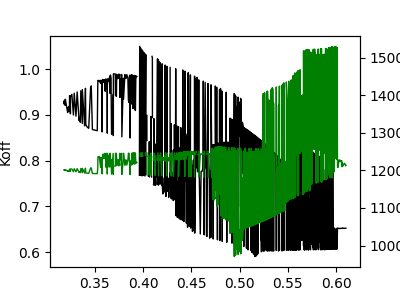

In [22]:
fig, ax1 = plt.subplots(figsize=(4,3))

ax2 = ax1.twinx()
ax1.plot(df_sort['GC_ratio'],df_sort['koff_interp'],color='black',linewidth=1, label='basepairs')
# ax1.set_xlabel('Time/s')
ax1.set_ylabel('Koff', color='black')

ax2.plot(df_sort['GC_ratio'],df_sort['kon_interp'],color='green',linewidth=1, label='fluorescence intensity')

ax2.set_ylabel('kon', color='green')

# plt.legend()
# plt.xlim(35,70)
plt.show()
plt.tight_layout()
# plt.savefig(kymo_path + '-cycle' + kymo_cycle + '-raw Bp-intensity along DNAp Trajectory'+'.png', dpi=300)

In [27]:
# Save all the analyzed data in an excel file and the analysis log 
excel_filename = "position-koff-kon" + '.xlsx'
# no idea why it causes errors without this step
writer = pd.ExcelWriter(excel_filename)

data1 = {'position':seq_ind_koff,
        'koff':seq_koff,
        'seq_koff_sem':seq_koff_sem}
data2 = {'position':seq_ind_kon,
        'kon':seq_kon,
        'seq_kon_sem':seq_kon_sem}
data3 = {'position':seq,
        'GC_ratio':GC_ratio}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

df1.to_excel(writer,sheet_name ='koff')
df2.to_excel(writer,sheet_name ='kon')
df3.to_excel(writer,sheet_name ='gc-ratio')
df_sort.to_excel(writer,sheet_name ='data_sorted')


writer.save()

In [ ]:
pause

In [49]:
filename_gc_kon_koff = '/Users/longfu/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/T7 gp2.5 MS_2021/Data&CodeRepository/Fig4/position-koff-kon.xlsx' 

data_gc_kon_koff = pd.read_excel(filename_gc_kon_koff,sheet_name = 'GC_sorted')
print(data_gc_kon_koff.head())

gc = data_gc_kon_koff['gc_bin']
gc_koff = data_gc_kon_koff['koff_median']
gc_koff_sem_low = data_gc_kon_koff['koff_low']
gc_koff_sem_high = data_gc_kon_koff['koff_high']
gc_kon = data_gc_kon_koff['kon_median']
gc_kon_sem_low = data_gc_kon_koff['kon_low']
gc_kon_sem_high = data_gc_kon_koff['kon_high']

print(gc_kon_sem_high)

    gc_bin   kon_median      kon_low     kon_high  koff_low  koff_high  \
0  0.31831  12006.39694  11964.76326  12048.03063   0.89743    0.95026   
1  0.33290  11952.13775  11922.92223  12069.00263   0.87088    0.96356   
2  0.34750  12373.68735  11912.59205  12453.38348   0.86433    0.97815   
3  0.36209  12311.08027  11899.65358  12456.20679   0.85612    0.98994   
4  0.37668  12248.47459  11891.72302  12461.25175   0.85108    0.98847   

   koff_median  
0      0.92384  
1      0.88942  
2      0.97284  
3      0.97333  
4      0.98157  
0     12048.03063
1     12069.00263
2     12453.38348
3     12456.20679
4     12461.25175
5     12464.60733
6     12466.75959
7     12468.77297
8     12503.20825
9     12508.53097
10    12632.14570
11    12622.31948
12    12595.90091
13    12583.42702
14    14173.80311
15    14357.93694
16    14642.06306
17    15213.23847
18    15263.28387
19    15301.24388
Name: kon_high, dtype: float64


In [83]:
fig, ax1 = plt.subplots(figsize=(6,4))

ax2 = ax1.twinx()
ax1.plot(gc,gc_koff,'r',linewidth =2, label = 'Koff')
ax1.fill_between(gc, gc_koff_sem_low, gc_koff_sem_high,color = 'red', alpha=0.1)
# ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.set_ylabel('Average $K_{off}$ ($s^{-1}$)')
# # ax1.set_ylabel('Average $K_{off}$')
ax1.tick_params(axis='y')
ax1.set_xlim(0.3,0.6)
ax1.set_ylim(0.6,1)
ax1.tick_params(axis='y', colors='red')
ax1.yaxis.label.set_color('red')
ax1.set_xlabel('GC Content')
# ax1.set_xticks([])

ax2.plot(gc,gc_kon,'blue',linewidth =2)
ax2.fill_between(gc, gc_kon_sem_low, gc_kon_sem_high,color = 'blue', alpha=0.1)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.set_ylabel('$k_{on}$ \n ($s^{-1}*M^{-1}*Site^{-1}$)')
# ax2.set_ylabel('$K_{on}$')
ax2.tick_params(axis='y')
ax2.set_xlim(0.3,0.6)
ax2.set_ylim(9000,15000)
ax2.tick_params(axis='y', colors='blue')
ax2.yaxis.label.set_color('blue')
# ax2.set_xticks([])

# plt.legend()

plt.show()
plt.tight_layout()
plt.savefig('Fig 4D' + '.eps', format='eps')
plt.savefig('Fig 4D' + '.png', dpi= 600)
# plt.savefig(kymo_path + '-cycle' + kymo_cycle + '-raw Bp-intensity along DNAp Trajectory'+'.png', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
fig, ax = plt.subplots(figsize=(4,3))

ax1 = plt.subplot(311)                                                        
ax1.plot(seq_ind_koff,seq_koff,'r',linewidth =1.5, label = 'Koff')
ax1.fill_between(seq_ind_koff, seq_koff - seq_koff_sem, seq_koff + seq_koff_sem,color = 'red', alpha=0.1)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# ax1.set_ylabel('Average $K_{off}$ ($s^{-1}$)')
ax1.set_ylabel('Average $K_{off}$')
ax1.tick_params(axis='y')
ax1.set_xlim(-1,50)
ax1.set_xticks([])

ax2.plot(gc,gc_kon,'green',linewidth =1.5)
ax2.fill_between(gc_kon, gc_kon - seq_kon_sem, gc_kon + seq_kon_sem,color = 'green', alpha=0.1)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# ax2.set_ylabel('$K_{on} \n $($s^{-1}*M^{-1}*Site^{-1}$)')
ax2.set_ylabel('$K_{on}$')
ax2.tick_params(axis='y')
ax2.set_xlim(-1,50)
ax2.set_xticks([])



ax3 = plt.subplot(313)
ax3.plot(seq,GC_ratio,color='black',linewidth=1.5, label='GC Ratio')
# ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax3.set_ylabel('GC Content')
ax3.set_xlim(-1,50)
ax3.set_xlabel("Position Along DNA (knt)")

plt.show()
plt.tight_layout()
plt.savefig('Fig 4F' + '.eps', format='eps')